# IRIS FLOWER CLASSIFICATION
PROBLEM STATEMENT: Iris flower has three species:Setosa,Vercicolor and Virginica, which differs according to their measurements.Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

Let's start by exploring the Logistic Regression machine learning algorithm, then transition to its application using the Iris flowers dataset. This dataset is renowned, containing attributes of various flower species such as Sepal Length, Sepal Width, Petal Length, and Petal Width.

In [1]:
#Importing the libraries.

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#df=pd.read_csv('filelocation').
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
#To get a concise summary of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#To generate descriptive statistics.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#To return the total number of elements.
df.size

750

In [6]:
#To get the dimensions.
df.shape

(150, 5)

In [7]:
#To check whether the dataset contains any missing values or nor.
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
#To check whether there are any duplicates or not.
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [9]:
#To analyze duplicate values
df.duplicated().sum()

1

In [10]:
#Dropping the duplicates.
df.drop_duplicates(inplace=True)
df.head(145)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica


In [11]:
df.reset_index()

,index,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
144,145,6.7,3.0,5.2,2.3,virginica
145,146,6.3,2.5,5.0,1.9,virginica
146,147,6.5,3.0,5.2,2.0,virginica
147,148,6.2,3.4,5.4,2.3,virginica


In [12]:
#To show column labels.
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [13]:
#To return a specified number of rows from the top.
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
#To return a specified number of rows from the bottom.
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [15]:
#Displays statistics about count, unique values, most frequent value, and its frequency for categorical columns.
df.describe(include='object')

,species
count,149
unique,3
top,setosa
freq,50


In [16]:
#To return the number of elements with the specified value.
df.count()

sepal_length    149
sepal_width     149
petal_length    149
petal_width     149
species         149
dtype: int64

In [17]:
#To check whether there are any null values or not.
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [18]:
#Checking whether duplicate still there or not.
df.duplicated().sum()

0

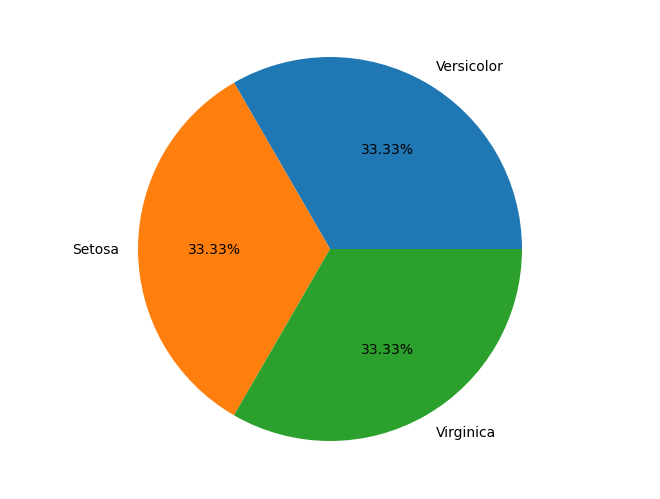

In [19]:
#Data Visualization.
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
l=['Versicolor','Setosa','Virginica']
s=[50,50,50]
ax.pie(s, labels=l,autopct='%1.2f%%')
plt.show()

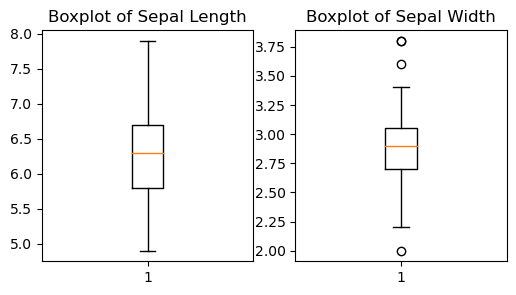

In [43]:
#Checking for the outliers.
fig = plt.figure(figsize=(6,3))
plt.subplot(121)
plt.boxplot([df['sepal_length']])
plt.title('Boxplot of Sepal Length')
plt.subplot(122)
plt.boxplot([df['sepal_width']])
plt.title('Boxplot of Sepal Width')
plt.show()

In [21]:
#Displaying unique species values in the 'species' column of the DataFrame.
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [22]:
#Removing setosa from the data set.
df['species']!='setosa'

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: species, Length: 149, dtype: bool

In [23]:
#Binary classification and stored in the dataset.
df=df[df['species']!='setosa']
df

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [24]:
#Map function, converting object to numerical values.
df['species']=df['species'].map({'versicolor':0,'virginica':1})

C:\Users\Priya_Harsha\AppData\Local\Temp\ipykernel_14532\3111638686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species']=df['species'].map({'versicolor':0,'virginica':1})


In [25]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


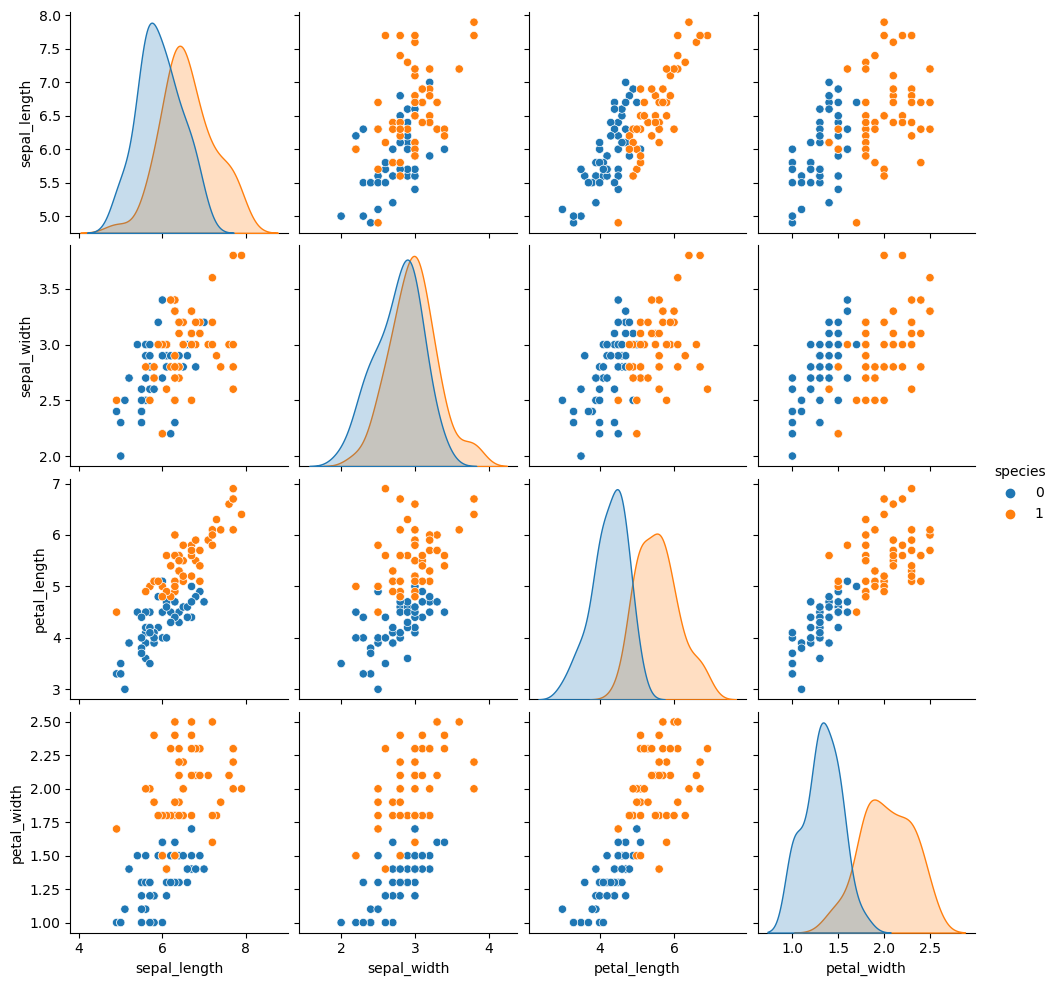

In [26]:
#PairPlot Analysis 
sns.pairplot(df,hue="species")

In [27]:
#Independent and dependent features
x=df.iloc[:,0:4] #leaving last column
y=df.iloc[:,4]
x

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train

,sepal_length,sepal_width,petal_length,petal_width
99,5.7,2.8,4.1,1.3
120,6.9,3.2,5.7,2.3
118,7.7,2.6,6.9,2.3
65,6.7,3.1,4.4,1.4
89,5.5,2.5,4.0,1.3
...,...,...,...,...
110,6.5,3.2,5.1,2.0
121,5.6,2.8,4.9,2.0
64,5.6,2.9,3.6,1.3
143,6.8,3.2,5.9,2.3


In [41]:
train, test=train_test_split(df, test_size = 0.25)
print(train.shape)
print(test.shape)

(74, 5)
(25, 5)


In [29]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier

LogisticRegression()

In [30]:
from sklearn.model_selection import GridSearchCV

parameter={'penalty':['l1','l2','elasticnet'],
          'C':[1,2,3,4,5,6,10,20,30,40,50],
          'max_iter':[100,200,300]}

In [31]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [32]:
classifier_regressor.fit(x_train,y_train)

C:\Users\Priya_Harsha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Priya_Harsha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Priya_Harsha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Priya_Harsha\anaconda3\Lib\site-pa

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [33]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [34]:
print(classifier_regressor.best_score_)

0.9625


In [35]:
#prediction
classifier_regressor.predict(x_test)

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [36]:
y_pred=classifier_regressor.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [37]:
#Score
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
y_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [38]:
score=accuracy_score(y_pred,y_test)
print(score)

0.95


In [39]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.88      1.00      0.93         7

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

